<a href="https://colab.research.google.com/github/dishant14/smoking-data-correlation-and-percentage-analysis/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyngrok
!pip install dash

from pyngrok import ngrok
ngrok.kill()
NGROK_AUTH_TOKEN = "2ee6s3naeL2vNkW3IOs3I3PAoOM_7Miw7pEMKWYRSDmp3BZTA"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok.connect(8050)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 46.0 MB/s eta 0:00:00


<NgrokTunnel: "https://2ace-34-106-64-166.ngrok-free.app" -> "http://localhost:8050">

In [2]:
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dash
from dash import dcc, html,Input, Output
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
url='https://www.kaggle.com/datasets/mexwell/uk-smoking-data'
filename='smoking.csv'
df=pd.read_csv(filename)

In [4]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [5]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [6]:
df.dtypes

gender                    object
age                        int64
marital_status            object
highest_qualification     object
nationality               object
ethnicity                 object
gross_income              object
region                    object
smoke                     object
amt_weekends             float64
amt_weekdays             float64
type                      object
dtype: object

In [7]:
df.describe()

,age,amt_weekends,amt_weekdays
count,1691.000000,421.000000,421.000000
mean,49.836192,16.410926,13.750594
std,18.736851,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,34.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,65.500000,20.000000,20.000000
max,97.000000,60.000000,55.000000


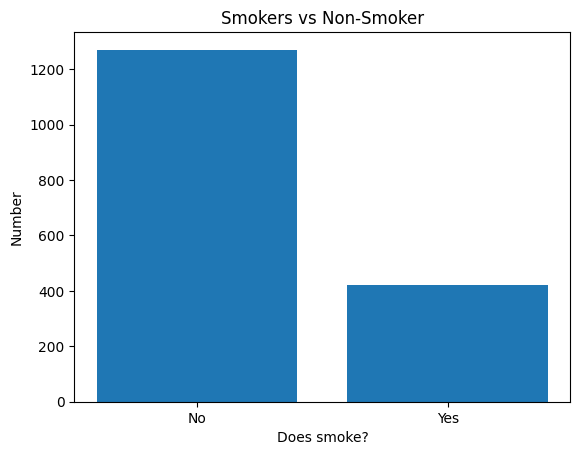

In [8]:
smoke_counts = df['smoke'].value_counts()

# Create a bar chart
plt.bar(smoke_counts.index, smoke_counts.values)
plt.xlabel('Does smoke?')
plt.ylabel('Number')
plt.title('Smokers vs Non-Smoker')
plt.show()

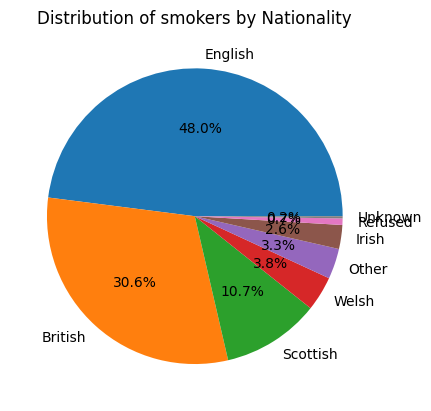

In [9]:
#pie chart

#count smokers
df['smoke'] = df['smoke'].str.lower().str.strip()
smokers_data = df[df['smoke'] == 'yes']
# print(smokers_data)

#count group by gender
nationality_count=smokers_data['nationality'].value_counts()
# print(gender_count)

plt.pie(nationality_count,labels=nationality_count.index,autopct='%1.1f%%')
plt.title('Distribution of smokers by Nationality')
plt.show()

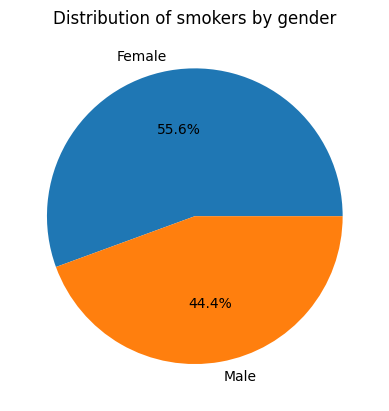

In [10]:
#pie chart

#count smokers
df['smoke'] = df['smoke'].str.lower().str.strip()
smokers_data = df[df['smoke'] == 'yes']
# print(smokers_data)

#count group by gender
gender_count=smokers_data['gender'].value_counts()
# print(gender_count)

plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%')
plt.title('Distribution of smokers by gender')
plt.show()

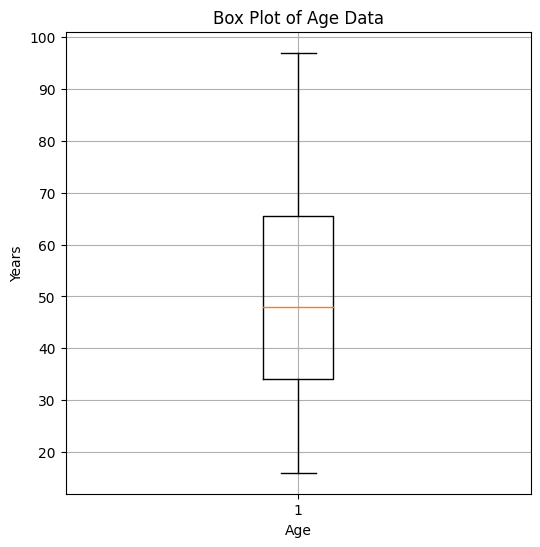

In [11]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Years')
plt.title('Box Plot of Age Data')
plt.grid(True)
plt.show()

In [12]:
import plotly.express as px

df['smoke'] = df['smoke'].str.lower().str.strip()
smokers_data = df[df['smoke'] == 'yes']

smokers_by_marital_status = smokers_data.groupby('marital_status').size().reset_index(name='count')

fig = px.bar(smokers_by_marital_status,x='marital_status',y='count',
             title='Contribution of Smokers by Marital Status',
             labels={'marital_status': 'Marital Status', 'count': 'Number of Smokers'})
fig.show()



In [13]:
smoking_file = open('/content/smoking.txt', 'r').read()
print ('File downloaded and saved!')

File downloaded and saved!


In [14]:
stopwords = set(STOPWORDS)

In [15]:
alice_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_font_size=100
)
# generate the word cloud
alice_wc.generate(smoking_file)

# plt.imshow(alice_wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()


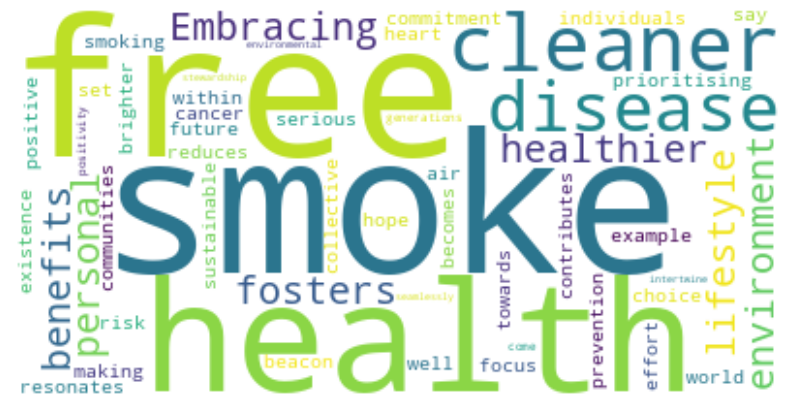

In [16]:
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(12) # set height
# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
app = dash.Dash(__name__)

# Define the app layout with CSS styling
app.layout = html.Div([
    html.H1('Interactive Dashboard', style={'textAlign': 'center'}),

    html.Div([
        # Charts in the first row
        html.Div([
            dcc.Graph(id='bar-chart'),
            dcc.Graph(id='histogram')
        ], style={'display': 'flex', 'flex-direction': 'row'}),

        # Charts in the second row
        html.Div([
            dcc.Graph(id='pie-chart'),
            dcc.Graph(id='box-plot')
        ], style={'display': 'flex', 'flex-direction': 'row'}),
    ]),

    html.Div([
        # Charts in the third row
        html.Div([
            dcc.Graph(id='line-chart'),
            dcc.Graph(id='scatter-plot')
        ], style={'display': 'flex', 'flex-direction': 'row'}),

        # Charts in the fourth row
        html.Div([
            dcc.Graph(id='heatmap'),
            dcc.Graph(id='stacked-bar-chart')
        ], style={'display': 'flex', 'flex-direction': 'row'}),
    ]),

    html.Div([
        # Charts in the fifth row
        html.Div([
            dcc.Graph(id='area-chart'),
            dcc.Graph(id='donut-chart')
        ], style={'display': 'flex', 'flex-direction': 'row'}),
    ]),
])

# Callbacks for updating charts based on user input (if needed)
@app.callback(
    Output('bar-chart', 'figure'),
    Output('histogram', 'figure'),
    Output('pie-chart', 'figure'),
    Output('box-plot', 'figure'),
    # Output('line-chart', 'figure'),
    Output('scatter-plot', 'figure'),
    # Output('heatmap', 'figure'),
    Output('stacked-bar-chart', 'figure'),
    Output('area-chart', 'figure'),
    Output('donut-chart', 'figure'),
    Input('bar-chart', 'value'),  # Add input components here if needed
)
def update_charts(selected_value):  # Update this function based on your requirements
    # Update charts based on user input or interactions
    # Replace the following lines with your actual chart generation code
    bar_chart = px.bar(df, x='gender', y='age', title='Age Distribution by Gender')
    histogram = px.histogram(df, x='age', title='Age Histogram')
    pie_chart = px.pie(df, names='marital_status', title='Marital Status Distribution')
    box_plot = px.box(df, x='gender', y='gross_income', title='Income Distribution by Gender')
    # line_chart = px.line(df, x='age', y='amt_weekends', title='Weekend Activity by Age')
    scatter_plot = px.scatter(df, x='age', y='amt_weekdays', color='smoke', title='Weekday vs Weekend Activity')
    # heatmap = px.imshow([[1, 2, 3], [4, 5, 6]], title='Sample Heatmap')
    stacked_bar_chart = px.bar(df, x='region', y='age', color='marital_status', title='Age Distribution by Region and Marital Status')
    area_chart = px.area(df, x='age', y='amt_weekdays', title='Weekday Activity Area Chart')
    donut_chart = px.pie(df, names='type', title='Type Distribution')

    return bar_chart, histogram, pie_chart, box_plot, scatter_plot, stacked_bar_chart, area_chart, donut_chart


if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>